# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn.fit(x=training_set, validation_data=test_set, epochs=50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7209 - loss: 0.5462 - val_accuracy: 0.7200 - val_loss: 0.5645
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.7451 - loss: 0.5119 - val_accuracy: 0.7350 - val_loss: 0.5423
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7673 - loss: 0.4878 - val_accuracy: 0.7855 - val_loss: 0.4681
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7812 - loss: 0.4533 - val_accuracy: 0.7770 - val_loss: 0.4770
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7960 - loss: 0.4387 - val_accuracy: 0.7980 - val_loss: 0.4556
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7988 - loss: 0.4349 - val_accuracy: 0.8105 - val_loss: 0.4462
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8047 - loss: 0.4230 - val_accuracy: 0.8055 - val_loss: 0.4401
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8119 - loss: 0.4020 - 

## Part 4 - Making a single prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


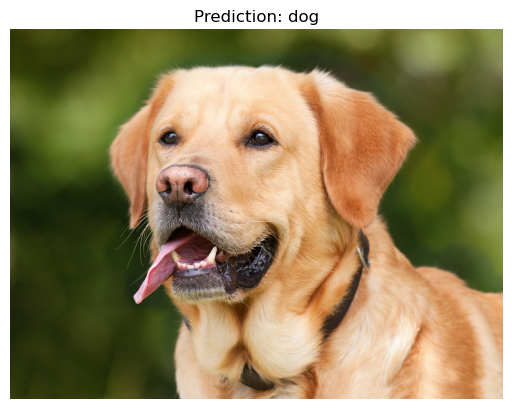

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


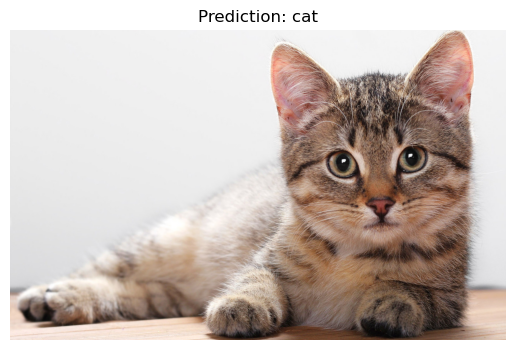

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load, preprocess, and predict an image
def predict_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    result = cnn.predict(img_array)
    prediction = 'dog' if result[0][0] == 1 else 'cat'

    # Display the image and prediction
    plt.imshow(plt.imread(image_path))
    plt.axis('off')
    plt.title(f'Prediction: {prediction}')
    plt.show()

# Predict and display both images
predict_image('dataset/single_prediction/cat_or_dog_1.jpg')
predict_image('dataset/single_prediction/cat_or_dog_2.jpg')


# Conclusion
## The model shows the accuracy of 96.13% for the training set and 80.25% for the validation set.

# GitHub and Medium

** GitHub Link** [**here**](https://github.com/qqiu2024/CNN-for-Image-Classification)

** Medium Link** [**here**](https://medium.com/@qqiu_58606/cnn-for-image-classification-b552df328075)